<a href="https://colab.research.google.com/github/cpwan/Attack-Adaptive-Aggregation/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/cpwan/OCR-API

Cloning into 'OCR-API'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 3), reused 13 (delta 1), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [2]:
%cd OCR-API

/content/OCR-API


In [3]:
# !docker-compose -f docker-compose.dev.yml up --build

In [4]:
!apt-get update && apt-get install -y tesseract-ocr-eng
!pip3 install -r requirements.txt
# !python3 -m flask run --host=0.0.0.0 2>&1 
!pip3 install gunicorn
!gunicorn app:app -b 0.0.0.0:5000 -D

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://security.ubuntu.com/ubu

In [5]:
!python3 -m pytest

============================= test session starts ==============================
platform linux -- Python 3.7.10, pytest-3.6.4, py-1.10.0, pluggy-0.7.1
rootdir: /content/OCR-API, inifile:
plugins: typeguard-2.7.1
collected 2 items                                                              

test_ocr.py ..                                                           [100%]

=========================== 2 passed in 6.06 seconds ===========================


In [6]:
from getTestPair import *

In [7]:
image_data,expected_text,= getTestPairs('photo.tif')

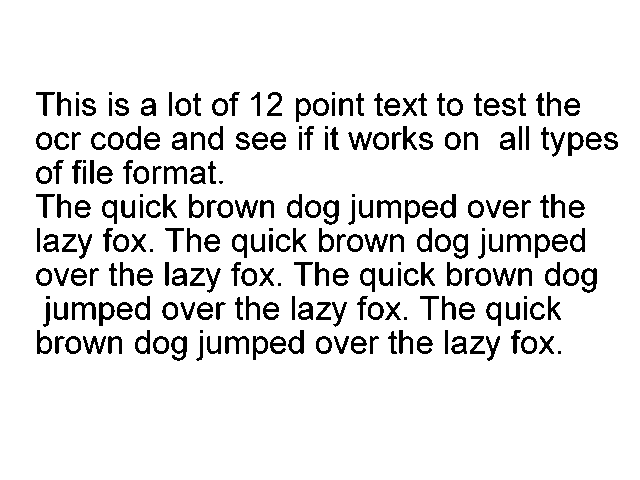

In [8]:
from PIL import Image
Image.open('photo.tif')

In [9]:
print(len(image_data))
print(image_data[:1000]) # base64 image

51560
SUkqAAgAAAAOAP4ABAABAAAAAAAAAAABAwABAAAAgAIAAAEBAwABAAAA4AEAAAIBAwABAAAAAQAAAAMBAwABAAAAAQAAAAYBAwABAAAAAAAAABEBBAABAAAADAEAABUBAwABAAAAAQAAABYBAwABAAAA4AEAABcBBAABAAAAAJYAABoBBQABAAAAtgAAABsBBQABAAAAvgAAACgBAwABAAAAAgAAAEmGAQBGAAAAxgAAAAAAAACAhB4AECcAAICEHgAQJwAAOEJJTQPtAAAAAAAQAMgAAAABAAEAyAAAAAEAAThCSU0D8wAAAAAACAAAAAAAAAAAOEJJTScQAAAAAAAKAAEAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [10]:
import requests

url = 'http://localhost:5000/image-sync'
myobj = {'image_data': image_data}

x = requests.post(url, json = myobj)

print(x)
print(x.text)

<Response [200]>
{"text":"This is a lot of 12 point text to test the\nocr code and see if it works on all types\nof file format.\n\nThe quick brown dog jumped over the\nlazy fox. The quick brown dog jumped\nover the lazy fox. The quick brown dog\njumped over the lazy fox. The quick\nbrown dog jumped over the lazy fox.\n\f"}

